In [15]:
import glob
import quakeio
from datetime import datetime
from CE58658.utilities import *
from CE58658 import plotSensorRH
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json

In [16]:
with open("database-pretty.json", "r") as read_database:
    database = json.load(read_database)
events = database["data"]
spectral_data = [event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"] for event in events][:-1]

In [17]:
spectral_data_summaries = [s["summary"]["S1"]["data"] for s in spectral_data]

In [18]:
f1 = [1/(d["frequency"]) for data in spectral_data_summaries for d in data]
# f1 = [1/(d["frequency"]/(2*np.pi)) for data in spectral_data_summaries for d in data]

Text(0.5, 1.0, 'Distribution of Fundamental Periods (s)')

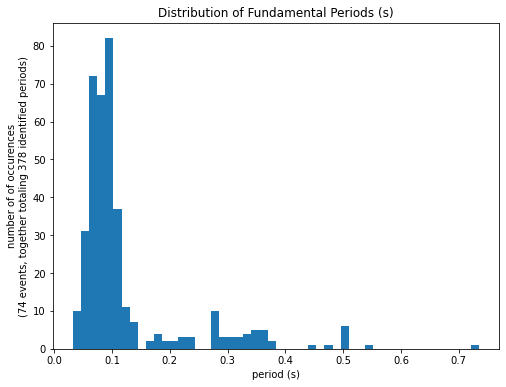

In [19]:
n_events = len(spectral_data_summaries)
n_freqeuncies = len(f1)
fig, ax = plt.subplots(1,1, figsize=(8,6))
n, bins, patches = ax.hist(f1, density=False, bins=50)
ax.set_xlabel("period (s)")
ax.set_ylabel(f"number of of occurences\n({n_events} events, together totaling {n_freqeuncies} identified periods)")
ax.set_title("Distribution of Fundamental Periods (s)")